In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.model_selection import train_test_split as TTS
from tensorflow.keras.models import load_model

In [7]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2006-01-01', end = '2019-01-01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.284267
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.290990
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.272961
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.331634
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.323994


In [8]:
print("Rows : ", len(df))
print("Columns : ", len(df.columns))

Rows :  3271
Columns :  6


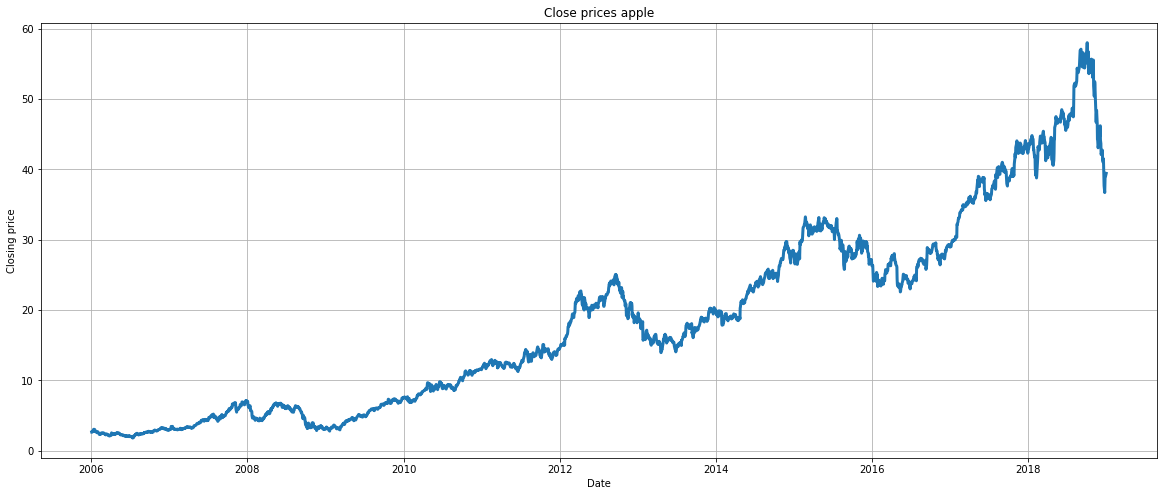

In [9]:
plt.figure(figsize = (20,8))
plt.title("Close prices apple")
plt.plot(df.index, df['Close'], linewidth = 3)
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.grid(True)
plt.show()

In [10]:
new_df = df[['Close']]
new_df.head()

,Close
Date,
2006-01-03,2.669643
2006-01-04,2.677500
2006-01-05,2.656429
2006-01-06,2.725000
2006-01-09,2.716071


In [11]:
xvals = new_df.values
xvals

array([[ 2.66964293],
       [ 2.67750001],
       [ 2.65642858],
       ...,
       [39.03749847],
       [39.05749893],
       [39.43500137]])

In [12]:
scaler = MMS(feature_range = (0,1))
scaled_data = scaler.fit_transform(xvals)

In [13]:
len_preds = 60
xvals = []
yvals = []

for var1 in range(len_preds, len(scaled_data)):
    xvals.append(list(scaled_data[var1 - len_preds : var1, 0]))
    yvals.append(scaled_data[var1, 0])
    
xvals, yvals = np.array(xvals), np.array(yvals)

In [14]:
print(xvals[0:3])
print(yvals[0:3])

[[0.01530035 0.01544014 0.01506525 0.01628521 0.01612637 0.01918263
  0.02111423 0.02136203 0.02218805 0.0216289  0.02021832 0.0180262
  0.01615178 0.01715571 0.01612001 0.01495088 0.01376269 0.01357207
  0.0154592  0.01578325 0.01572606 0.01361655 0.0134577  0.01056664
  0.01075726 0.01152609 0.00907346 0.010573   0.00892097 0.01078268
  0.01178661 0.01264439 0.01246648 0.01169765 0.01312094 0.01339416
  0.0132099  0.01291126 0.01132277 0.01171036 0.01203441 0.01083351
  0.00941022 0.0099376  0.0095246  0.00842536 0.00795516 0.0095373
  0.01057935 0.00988677 0.00866681 0.0088892  0.00846348 0.00707832
  0.00698936 0.00602991 0.00590283 0.00561691 0.00510859 0.00740872]
 [0.01544014 0.01506525 0.01628521 0.01612637 0.01918263 0.02111423
  0.02136203 0.02218805 0.0216289  0.02021832 0.0180262  0.01615178
  0.01715571 0.01612001 0.01495088 0.01376269 0.01357207 0.0154592
  0.01578325 0.01572606 0.01361655 0.0134577  0.01056664 0.01075726
  0.01152609 0.00907346 0.010573   0.00892097 0.01

In [15]:
train_length = round(len(xvals) * 0.8)
train_x = xvals[0 : train_length + 1]
train_y = yvals[0 : train_length + 1]
test_x = xvals[train_length + 1:]
test_y = yvals[train_length + 1:]

In [16]:
print("Train length (x) : ", train_x.shape)
print("Train length (y) : ", train_y.shape)

print("Test length (x): ", test_x.shape)
print("Test length (y): ", test_y.shape)

Train length (x) :  (2570, 60)
Train length (y) :  (2570,)
Test length (x):  (641, 60)
Test length (y):  (641,)


In [17]:
for var2 in range(0, 8):
    print('Last X value : ', train_x[var2][-1])
    print('Y value : ', train_y[var2])
    print()

Last X value :  0.007408722815108314
Y value :  0.007675591277852965

Last X value :  0.007675591277852965
Y value :  0.007656528941819042

Last X value :  0.007656528941819042
Y value :  0.007612050157739879

Last X value :  0.007612050157739879
Y value :  0.006671662788717753

Last X value :  0.006671662788717753
Y value :  0.010509461608941971

Last X value :  0.010509461608941971
Y value :  0.013070109365275008

Last X value :  0.013070109365275008
Y value :  0.012148784332286805

Last X value :  0.012148784332286805
Y value :  0.011437140753941477



In [18]:
train_x, test_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1)), test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [19]:
train_x.shape

(2570, 60, 1)

In [23]:
model = Sequential()

model.add(Input(shape = (train_x.shape[1], train_x.shape[2])))

model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_x, train_y, epochs = 3)

Epoch 1/3
2570/2570 [==============================] - 32s 12ms/sample - loss: 1.3328e-04 - mean_absolute_error: 0.0082
Epoch 2/3
2570/2570 [==============================] - 37s 15ms/sample - loss: 1.2572e-04 - mean_absolute_error: 0.0080
Epoch 3/3
2570/2570 [==============================] - 36s 14ms/sample - loss: 1.1493e-04 - mean_absolute_error: 0.0076


In [26]:
test_x.shape

(641, 60, 1)

In [27]:
pred = model.predict(test_x)

In [28]:
test_y = test_y.reshape((test_y.shape[0]))
pred = pred.reshape((pred.shape[0]))

In [29]:
preds_df = pd.DataFrame({"Predictions" : pred, "Actual" : test_y})
preds_df.head()

,Predictions,Actual
0,0.426520,0.399861
1,0.425947,0.401685
2,0.425336,0.391811
3,0.424145,0.390788
4,0.422602,0.394391


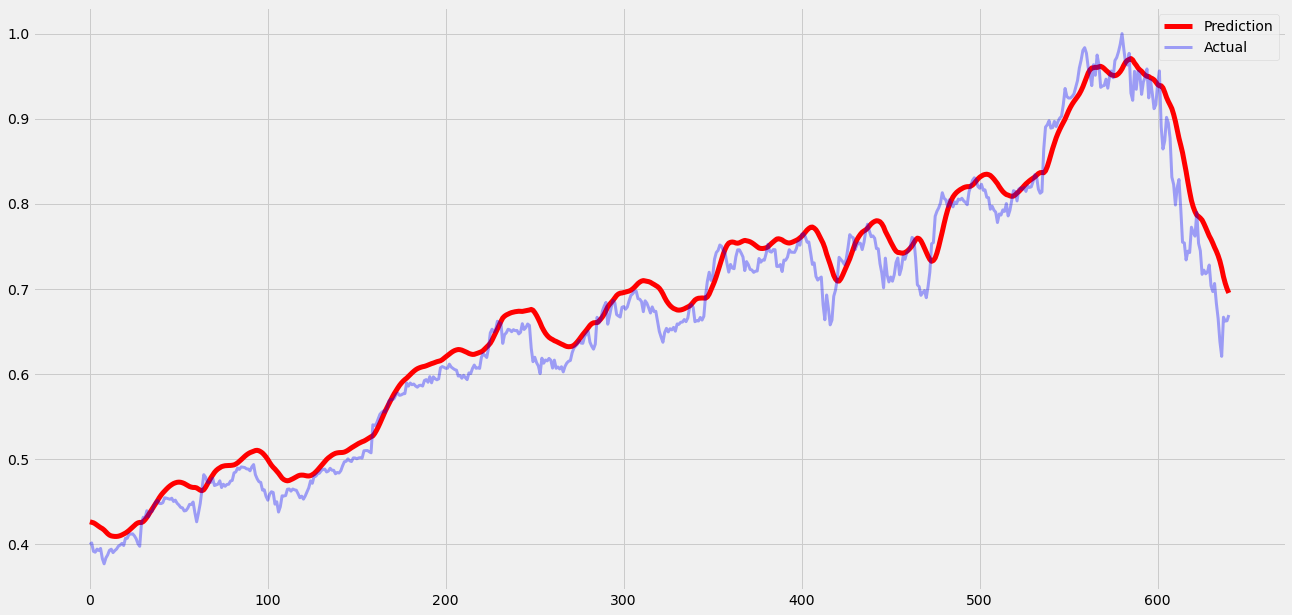

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))

plt.plot(preds_df['Predictions'], linewidth = 5, color = 'red', label = "Prediction")
plt.plot(preds_df['Actual'], linewidth = 3, color = 'blue', label = 'Actual', alpha = 0.35)

plt.legend()
plt.grid(True)
plt.show()